<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia_eda_analysis/blob/main/EDA_07_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [3]:
from google import colab
colab.drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_9.xlsx')

# **Final Arrangements on data frame**

In [5]:
df["Waist_Hip_Ratio"] = df["Waist_Hip_Ratio"].round(decimals=2)

In [40]:
df_temp = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_7.xlsx')

In [43]:
df.head()

,Age,Age_Group,Weight,DM_Type2,OP,Chronic_Diseases,Total_Number_of_Chronic_Diseases,Total_Duration_of_Chronic_Diseases,Number_of_Drug_Used,Education,...,Work_Status,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
0,74.0,AGE 60-80,88.0,1,1,"DM_Type2, KAH,OP",4,5.0,3,University,...,not working,3-4/week,50.2,12.5,1.21,32.0,1.81,1.000000,27.8,0
1,62.0,AGE 60-80,105.0,0,0,NaN,0,0.0,0,Secondary School,...,not working,0,49.0,12.1,1.42,47.0,1.38,1.122709,35.5,1
2,65.0,AGE 60-80,89.0,0,0,NaN,0,0.0,0,University,...,not working,3-4/week,37.3,8.7,1.18,33.0,1.20,0.964912,31.2,0
3,71.0,AGE 60-80,68.0,0,1,"Asthma,OP",5,12.0,1,University,...,not working,1-2/week,29.5,8.3,1.23,25.0,1.11,1.030000,26.6,0
4,61.0,AGE 60-80,80.0,0,0,Asthma,3,1.5,1,University,...,not working,1-2/week,39.5,11.0,1.31,31.0,1.26,0.971429,31.3,0


In [41]:
df_temp.head()

,Unnamed: 0,Name,Gender,Age,Age_Group,Weight,DM_Type2,DM_Type2_Drug,OP,Number_of_HT,...,Exercise,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
0,0,beyzanur 0,M,74.0,AGE 60-80,88.0,1,"Metformin, Gliclazide,sitagliptin",1.0,1,...,3-4/week,1,50.2,12.5,1.21,32.0,1.81,1.000000,27.8,0
1,1,beyzanur 1,M,62.0,AGE 60-80,105.0,0,0,0.0,0,...,0,0,49.0,12.1,1.42,47.0,1.38,1.136364,35.5,1
2,2,beyzanur 2,M,65.0,AGE 60-80,89.0,0,0,0.0,0,...,3-4/week,1,37.3,8.7,1.18,33.0,1.20,0.964912,31.2,0
3,3,beyzanur 3,F,71.0,AGE 60-80,68.0,0,0,1.0,3,...,1-2/week,1,29.5,8.3,1.23,25.0,1.11,1.030000,26.6,0
4,4,beyzanur 4,F,61.0,AGE 60-80,80.0,0,0,0.0,2,...,1-2/week,1,39.5,11.0,1.31,31.0,1.26,0.971429,31.3,0


In [46]:
df["Gender"] = df_temp["Gender"]
df["Name"] = df_temp["Name"]

In [47]:
df.head()

,Age,Age_Group,Weight,DM_Type2,OP,Chronic_Diseases,Total_Number_of_Chronic_Diseases,Total_Duration_of_Chronic_Diseases,Number_of_Drug_Used,Education,...,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia,Gender,Name
0,74.0,AGE 60-80,88.0,1,1,"DM_Type2, KAH,OP",4,5.0,3,University,...,50.2,12.5,1.21,32.0,1.81,1.000000,27.8,0,M,beyzanur 0
1,62.0,AGE 60-80,105.0,0,0,NaN,0,0.0,0,Secondary School,...,49.0,12.1,1.42,47.0,1.38,1.122709,35.5,1,M,beyzanur 1
2,65.0,AGE 60-80,89.0,0,0,NaN,0,0.0,0,University,...,37.3,8.7,1.18,33.0,1.20,0.964912,31.2,0,M,beyzanur 2
3,71.0,AGE 60-80,68.0,0,1,"Asthma,OP",5,12.0,1,University,...,29.5,8.3,1.23,25.0,1.11,1.030000,26.6,0,F,beyzanur 3
4,61.0,AGE 60-80,80.0,0,0,Asthma,3,1.5,1,University,...,39.5,11.0,1.31,31.0,1.26,0.971429,31.3,0,F,beyzanur 4


In [48]:
df.to_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_9.xlsx')

In [50]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_9.xlsx')

In [55]:
df.insert(1,"Name", df.pop("Name"))

In [56]:
df.insert(2,"Gender", df.pop("Gender"))

In [65]:
df.rename(columns ={"Unnamed: 0":"Order"}, inplace = True)

In [66]:
df.columns

Index(['Order', 'Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2',
       'OP', 'Chronic_Diseases', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Job', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

In [67]:
df.to_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_9.xlsx', index=False)

In [7]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_9.xlsx')

In [8]:
df.columns

Index(['Order', 'Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2',
       'OP', 'Chronic_Diseases', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Job', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

# **Linear Regression Analyses**

#Cleaning columns that can not be used in lineer regression model.

In [9]:
df.drop("Name",axis=1,inplace=True)

In [10]:
df.drop("Order",axis=1,inplace=True)

In [11]:
df.head()

,Gender,Age,Age_Group,Weight,DM_Type2,OP,Chronic_Diseases,Total_Number_of_Chronic_Diseases,Total_Duration_of_Chronic_Diseases,Number_of_Drug_Used,...,Work_Status,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
0,M,74.0,AGE 60-80,88.0,1,1,"DM_Type2, KAH,OP",4,5.0,3,...,not working,3-4/week,50.2,12.5,1.21,32.0,1.81,1.000000,27.8,0
1,M,62.0,AGE 60-80,105.0,0,0,NaN,0,0.0,0,...,not working,0,49.0,12.1,1.42,47.0,1.38,1.122709,35.5,1
2,M,65.0,AGE 60-80,89.0,0,0,NaN,0,0.0,0,...,not working,3-4/week,37.3,8.7,1.18,33.0,1.20,0.964912,31.2,0
3,F,71.0,AGE 60-80,68.0,0,1,"Asthma,OP",5,12.0,1,...,not working,1-2/week,29.5,8.3,1.23,25.0,1.11,1.030000,26.6,0
4,F,61.0,AGE 60-80,80.0,0,0,Asthma,3,1.5,1,...,not working,1-2/week,39.5,11.0,1.31,31.0,1.26,0.971429,31.3,0


**Lets drop the columns that we don't want to include the lineer regression analysis.**

In [12]:
df_lineer = df.copy()

In [13]:
df_lineer.drop("Age_Group",axis=1,inplace=True)

In [14]:
df_lineer.drop("Job",axis=1,inplace=True)

In [15]:
df_lineer.drop("Gender",axis=1,inplace=True)

In [16]:
df_lineer.drop("Chronic_Diseases",axis=1,inplace=True)

In [17]:
df_lineer.columns

Index(['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

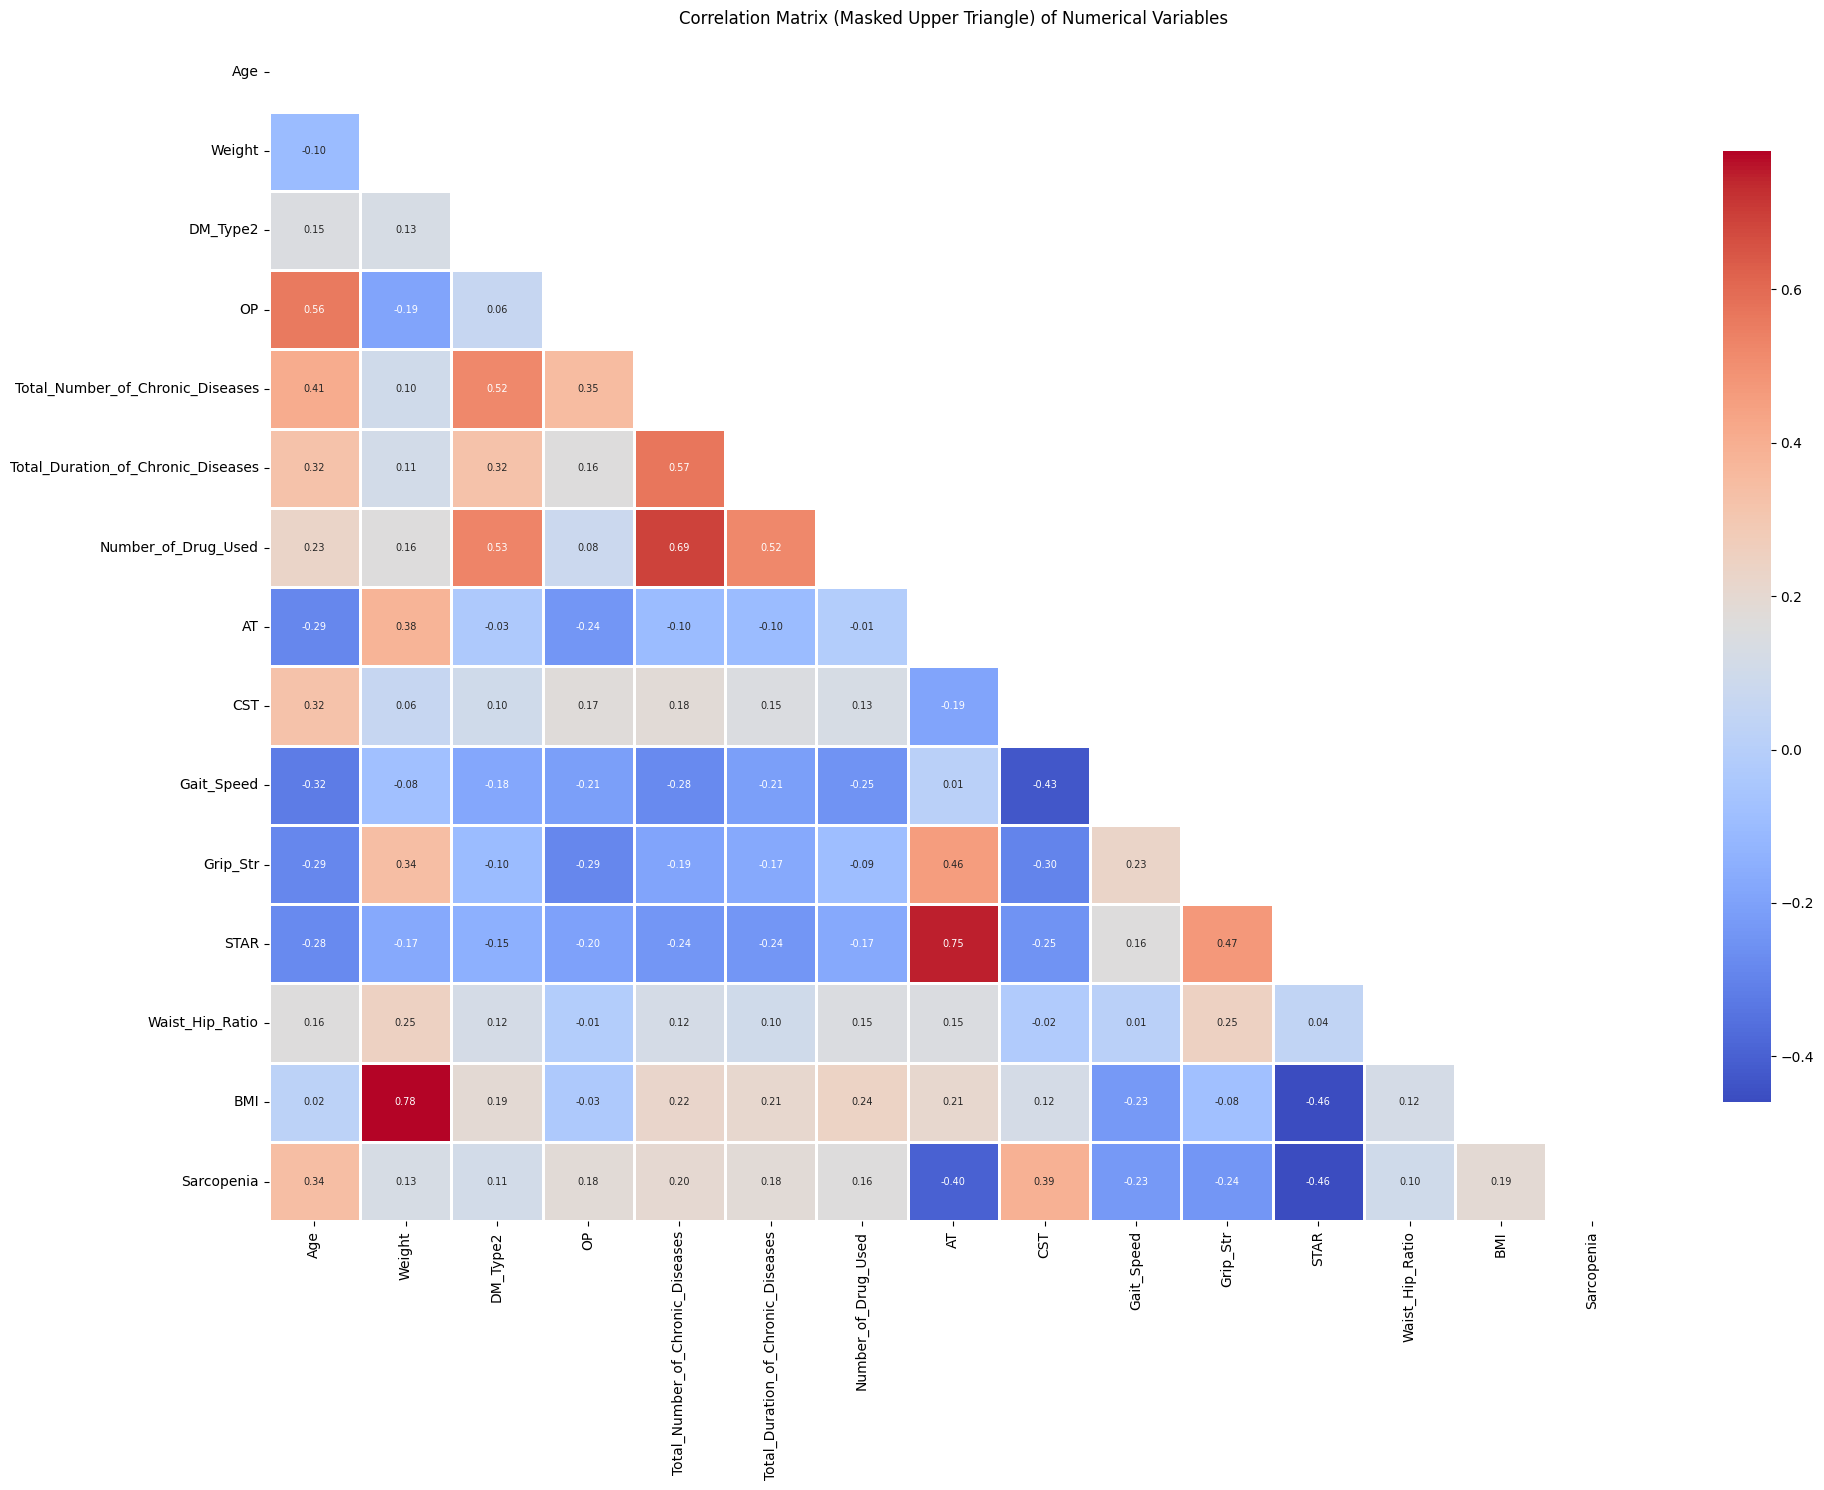

In [18]:
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr().round(2)

num_cols = len(df_numeric.columns)

fig_width = num_cols * 0.7
fig_height = num_cols * 0.7

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Create a mask for the upper triangle


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f",linewidths=1,cbar_kws={'shrink': 0.8},
    annot_kws={"fontsize": 7})
plt.title('Correlation Matrix (Masked Upper Triangle) of Numerical Variables')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

**The correlation matrix reveals a very strong positive correlation between Weight and BMI (0.78), which is expected given BMI is derived from weight and height. This high correlation indicates a potential multicollinearity issue if both are included as independent variables. Other notable correlations include AT and Grip_Str (0,46), STAR with AT (0,75), STAR, and Grip_Str (0,47), OP and Age (0,56), Total_Number_of_Chronic_Diseases and Total_Duration_of_Chronic_Diseases (0,57), Total_Number_of_Chronic_Diseases and Number_of_Drug_Used (0,69), Total_Duration_of_Chronic_Diseases and Number_of_Drug_Used (0,52), Number_of_Drug_Used and DM_Type2 (0,53). These relationships will be further investigated using VIF scores during model fitting to ensure the stability and interpretability of coefficients.**

In [19]:
df_lineer.columns

Index(['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

In [20]:
df_lineer.drop("Total_Number_of_Chronic_Diseases",axis=1,inplace=True)

In [21]:
df_lineer.drop("Number_of_Drug_Used",axis=1,inplace=True)

**For the linear regression analysis, the continuous dependent variable chosen was BMI. This selection is justified by BMI's widespread recognition as a key health indicator, reflecting overall body composition and often associated with various health conditions, including sarcopenia. The independent variables included in the final linear regression model were selected based on their potential clinical relevance and after careful consideration of multicollinearity from the refined EDA phase. These included Age, Weight, Total_Number_of_Chronic_Diseases, AT, CST, Gait_Speed, Grip_Str, STAR, Waist_Hip_Ratio, and the one-hot encoded binary variables for specific chronic diseases (DM_Type2, OP), Education and Work_Status.**

In [22]:
df_lineer.drop("Sarcopenia",axis=1,inplace=True)

In [23]:
df_lineer.columns

Index(['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Duration_of_Chronic_Diseases',
       'Education', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI'],
      dtype='object')

In [24]:
#Encode categorical variables (for logistic regression especially)
df_lineer = pd.get_dummies(df_lineer, drop_first=False)

In [25]:
df_lineer.head()

,Age,Weight,DM_Type2,OP,Total_Duration_of_Chronic_Diseases,AT,CST,Gait_Speed,Grip_Str,STAR,...,Education_Primary School,Education_Secondary School,Education_University,Education_illiterate,Work_Status_not working,Work_Status_unknown,Work_Status_working,Exercise_Status_0,Exercise_Status_1-2/week,Exercise_Status_3-4/week
0,74.0,88.0,1,1,5.0,50.2,12.5,1.21,32.0,1.81,...,False,False,True,False,True,False,False,False,False,True
1,62.0,105.0,0,0,0.0,49.0,12.1,1.42,47.0,1.38,...,False,True,False,False,True,False,False,True,False,False
2,65.0,89.0,0,0,0.0,37.3,8.7,1.18,33.0,1.20,...,False,False,True,False,True,False,False,False,False,True
3,71.0,68.0,0,1,12.0,29.5,8.3,1.23,25.0,1.11,...,False,False,True,False,True,False,False,False,True,False
4,61.0,80.0,0,0,1.5,39.5,11.0,1.31,31.0,1.26,...,False,False,True,False,True,False,False,False,True,False


In [26]:
df_lineer.columns

Index(['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Duration_of_Chronic_Diseases',
       'AT', 'CST', 'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Education_High School', 'Education_Primary School',
       'Education_Secondary School', 'Education_University',
       'Education_illiterate', 'Work_Status_not working',
       'Work_Status_unknown', 'Work_Status_working', 'Exercise_Status_0',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

In [27]:
#Split into features and target
X = df_lineer.drop('BMI', axis=1)
y = df_lineer['BMI']

In [28]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
#Evaluate
y_pred = lr_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1.8321135360278058
R² Score: 0.9325921402243795


In [31]:
#Analyze coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

                               Feature  Coefficient
9                                 STAR   -17.880512
10                     Waist_Hip_Ratio    -0.689149
5                                   AT     0.595180
7                           Gait_Speed    -0.573487
15                Education_illiterate     0.317185
13          Education_Secondary School    -0.197170
11               Education_High School    -0.192923
3                                   OP     0.138397
12            Education_Primary School     0.102858
1                               Weight     0.099007
19                   Exercise_Status_0     0.090667
21            Exercise_Status_3-4/week    -0.076549
17                 Work_Status_unknown     0.076267
18                 Work_Status_working    -0.071208
8                             Grip_Str    -0.053013
6                                  CST    -0.051487
14                Education_University    -0.029951
2                             DM_Type2    -0.020256
20          

In [32]:
print(X.dtypes)

Age                                   float64
Weight                                float64
DM_Type2                                int64
OP                                      int64
Total_Duration_of_Chronic_Diseases    float64
AT                                    float64
CST                                   float64
Gait_Speed                            float64
Grip_Str                              float64
STAR                                  float64
Waist_Hip_Ratio                       float64
Education_High School                    bool
Education_Primary School                 bool
Education_Secondary School               bool
Education_University                     bool
Education_illiterate                     bool
Work_Status_not working                  bool
Work_Status_unknown                      bool
Work_Status_working                      bool
Exercise_Status_0                        bool
Exercise_Status_1-2/week                 bool
Exercise_Status_3-4/week          

In [33]:
for col in X.columns:
    try:
        X[col] = X[col].astype("int64") if X[col].dtype == "bool" else X[col]
    except ValueError:
        print(f"Column '{col}' still contains non-numeric values after select_dtypes.")

In [34]:
print(X.dtypes)

Age                                   float64
Weight                                float64
DM_Type2                                int64
OP                                      int64
Total_Duration_of_Chronic_Diseases    float64
AT                                    float64
CST                                   float64
Gait_Speed                            float64
Grip_Str                              float64
STAR                                  float64
Waist_Hip_Ratio                       float64
Education_High School                   int64
Education_Primary School                int64
Education_Secondary School              int64
Education_University                    int64
Education_illiterate                    int64
Work_Status_not working                 int64
Work_Status_unknown                     int64
Work_Status_working                     int64
Exercise_Status_0                       int64
Exercise_Status_1-2/week                int64
Exercise_Status_3-4/week          

In [35]:
#Statistical Significance (using statsmodels)
X_sm = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X_sm)  # For linear regression
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     3384.
Date:                Sun, 15 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:30:09   Log-Likelihood:                -8721.3
No. Observations:                5016   AIC:                         1.748e+04
Df Residuals:                    4996   BIC:                         1.761e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Looking at P-values (Features with p < 0.05 are typically considered statistically significant) and Coefficients (Signs and magnitudes show influence direction and strength.), these are the outcomes of this analysis:
All the variables except "DM_Type2" has statistically significant impact on the dependent variable "BMI". Especially STAR variable has negative but very strong influence on BMI. Education Status, Work Status and Exercise status have also strong positive influence on BMI.**

<Axes: xlabel='STAR', ylabel='BMI'>

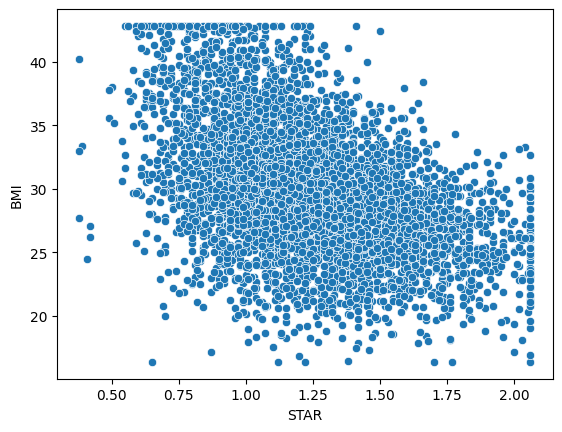

In [38]:
sns.scatterplot(data=df_lineer, x='STAR', y='BMI')

<Axes: xlabel='Weight', ylabel='BMI'>

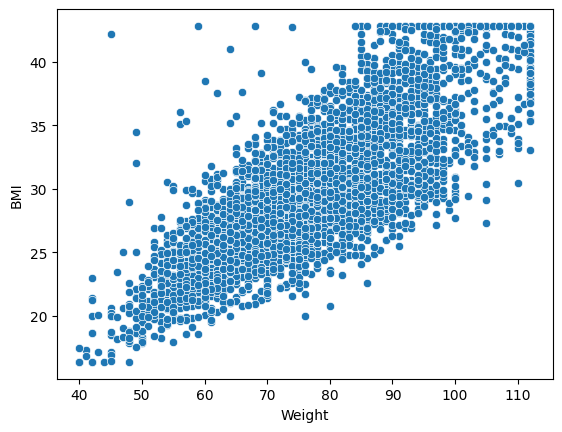

In [39]:
sns.scatterplot(data=df_lineer, x='Weight', y='BMI')

<Axes: xlabel='AT', ylabel='BMI'>

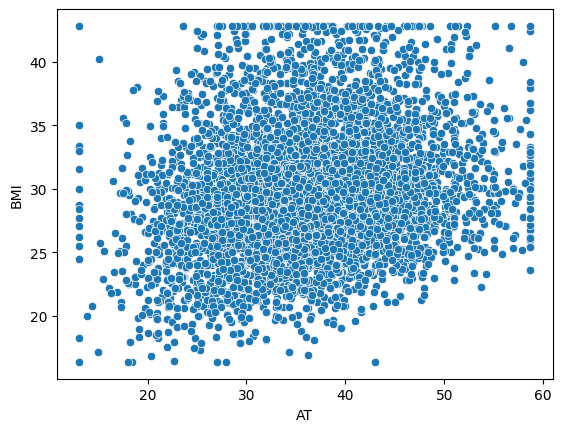

In [43]:
sns.scatterplot(data=df_lineer, x='AT', y='BMI')

<Axes: xlabel='Gait_Speed', ylabel='BMI'>

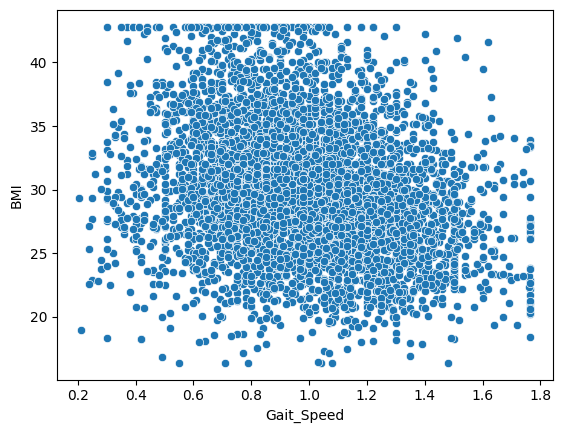

In [42]:
sns.scatterplot(data=df_lineer, x='Gait_Speed', y='BMI')

<Axes: xlabel='Education_Primary School', ylabel='BMI'>

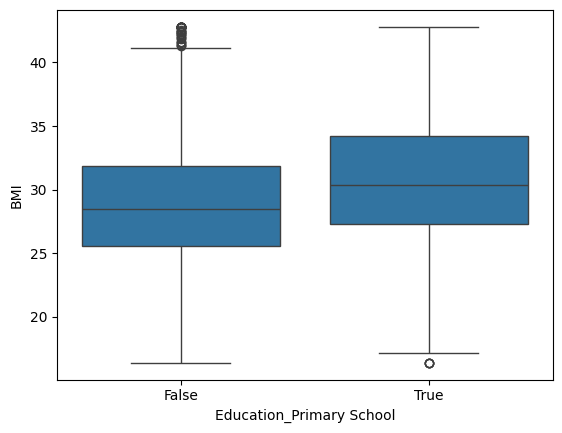

In [45]:
sns.boxplot(data=df_lineer, x='Education_Primary School', y='BMI')

<Axes: xlabel='Exercise_Status_0', ylabel='BMI'>

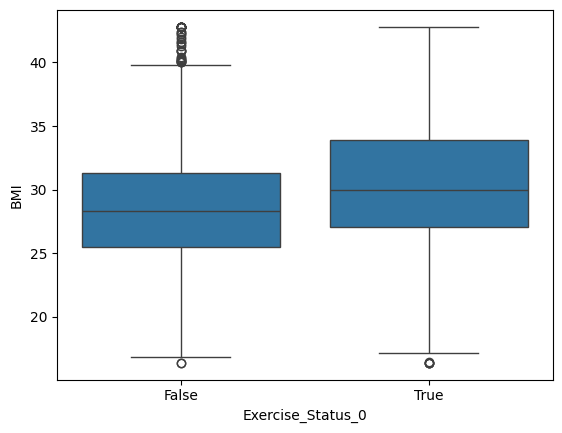

In [46]:
sns.boxplot(data=df_lineer, x='Exercise_Status_0', y='BMI')